## Début Régression Linéaire

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [65]:
X, y = datasets.load_diabetes(return_X_y=True)
print(X.shape)
print(X[0])

(442, 10)
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]


2 est pour la 2eme colonne(sur les 10 colonnes) du dataset, correspondant à la colonne BMIs

In [66]:
X = X[:, np.newaxis, 5]
print(X.shape)

(442, 1)


X, Y train pout former le Modele, X, Y test pour les valeurs tests

In [67]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33)

Entrainez le modele

In [68]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Créez une prédiction à l'aide de données de test, à l'aide de la fonction predict()
Ceci sera utilisé pour tracer la ligne entre les groupes de données

In [69]:
y_pred = model.predict(X_test)

In [64]:
mse = np.sqrt(mean_squared_error(y_test,y_pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(y_pred)*100:3.3}%)')
score = model.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 79.9 (53.4%)
Model determination:  0.0748570177424358


#### Régression polynomiale

In [44]:
pipeline = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())

pipeline.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [45]:
pred = pipeline.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test,pred))
print(f'Mean error: {mse:3.3} ({mse/np.mean(pred)*100:3.3}%)')
score = pipeline.score(X_train,y_train)
print('Model determination: ', score)

Mean error: 62.8 (41.9%)
Model determination:  0.36030808884933563


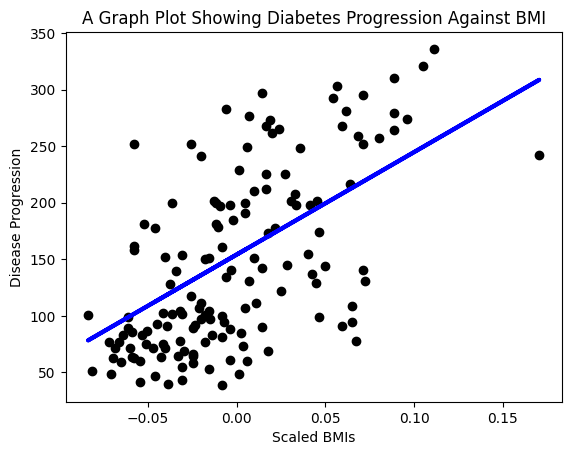

In [18]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Scaled BMIs')
plt.ylabel('Disease Progression')
plt.title('A Graph Plot Showing Diabetes Progression Against BMI')
plt.show()